In [6]:
import numpy as np
import matplotlib.pyplot as plt

```bandit``` is the reward function of a bandit. Each q value is picked from a gaussian distribution with 0 mean 1 variance. If ```stationary``` is ```false``` that means reward of a bandit changes at each time step.

In [17]:
def bandit(qs, action, stationary):
    q = qs[action] + np.random.randn()
    if not stationary:
        q += np.random.randn() * 0.01
    return q

```k``` is the bandit id.  
```epsilon``` is the probability of picking a random action for $\epsilon$-greedy approach.  
```alpha``` is the step size. If ```None``` step size is $\dfrac{1}{\mid A(k) \mid}$  
```qinit``` initial ```q``` values. This is for realistic or optimistic solutions.

In [3]:
def run(k, epsilon, time_steps, alpha=None, stationary=True, qinit=0):
    qs = np.random.randn(k)
    Q = np.zeros(k) + qinit
    action_counts = np.zeros(k)

    rewards = []
    avg_rewards = []

    for t in range(time_steps):
        if np.random.rand() < epsilon:
            a = np.random.randint(k)
        else:
            a = np.argmax(Q)

        if alpha is None:
            step_size = 1 if action_counts[a] == 0 else 1 / action_counts[a]
        else:
            step_size = alpha

        r = bandit(qs, a, stationary)
        Q[a] += step_size * (r - Q[a])
        rewards.append(r)
        avg_rewards.append(np.mean(rewards))
    return avg_rewards

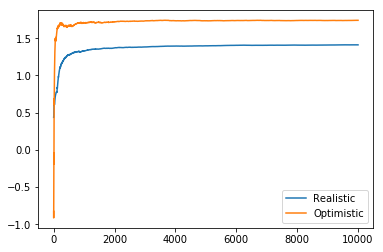

In [9]:
k = 10
time_steps = 10000
epsilon = 0.1

rewards = run(k, epsilon, time_steps)
plt.plot(rewards, label="Realistic")
rewards = run(k, epsilon, time_steps, qinit=5)
plt.plot(rewards, label="Optimistic")
plt.legend()

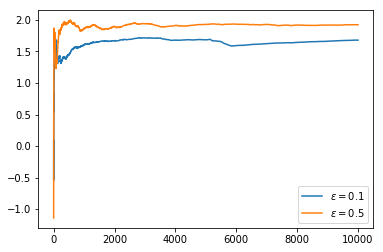

In [18]:
rewards = run(k, 0.0, time_steps)
plt.plot(rewards, label="$\epsilon=0.1$")
rewards = run(k, 0.1, time_steps)
plt.plot(rewards, label="$\epsilon=0.5$")
plt.legend()

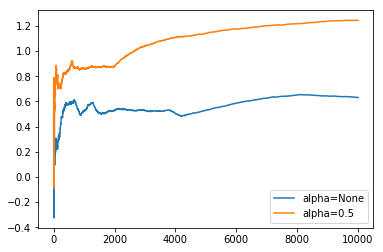

In [23]:
rewards = run(k, 0.0, time_steps, alpha=None)
plt.plot(rewards, label="alpha=None")
rewards = run(k, 0.0, time_steps, alpha=0.5)
plt.plot(rewards, label="alpha=0.5")
plt.legend()